In [1707]:
import tensorflow as tf
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [1708]:
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv
#link to download the CSV file
Iris=pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv")
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [1709]:
Iris.shape

(150, 5)

In [1710]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
Iris=Iris.loc[(Iris['species'] == 'versicolor') | (Iris['species'] == 'setosa')]
Iris.shape

(100, 5)

In [1711]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
Iris['species'].replace(['setosa','versicolor'],[0,1],inplace=True)

In [1712]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


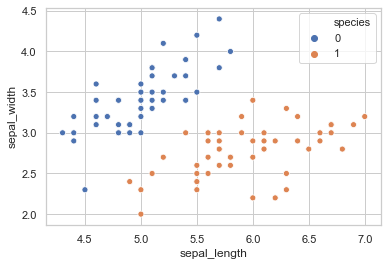

In [1713]:
#visualization of given dataset
sns.scatterplot(x="sepal_length",y="sepal_width",hue='species',data=Iris)
plt.legend(loc='best')

In [1714]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [1715]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)
#randomnly select 80% of the indices under variable train_index and rest under test_index
train_index= np.array(np.random.choice(len(X),int(len(X)*0.8),replace=False))
test_index = np.array(list(set(range(len(X))) - set(train_index)))
print(train_index)
print(test_index)

[66 32 46 28 74 23 10 20 17 35 97 37 70 40 60 34 42 57 12 69 94 56 22 39
 24 13 63 71 55 87  6 88 64 26 48 50 72 54 21 25 33 29 52 14 85 79 95  3
 43 11 98 45 83 67 89 86 49 82 59 19 81 38 68  2 31 84 51 36  4  0 58  5
 96  1 93 41  9 18 91 47]
[ 7  8 15 16 27 30 44 53 61 62 65 73 75 76 77 78 80 90 92 99]


In [1716]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [1717]:
# Define the min-max normalization function
# we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
def min_max_normalized(data):
    data=(data-data.min(axis=0))/(data.max(axis=0)-data.min(axis=0))
    return data

In [1718]:
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

In [1719]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
W=tf.Variable(tf.random_normal(shape=[4,1]))
b = tf.Variable(tf.random_normal(shape=[1, 1])) #bias
#constructor for random initialization
init=tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [1720]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [1721]:
# Declare the 'model' you need to learn
mod=tf.matmul(data,W)+b

In [1722]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [1723]:
# Define the learning rate， batch_size and number of iterations.
learning_rate=0.005
batch_size=30
iter_num=1500

In [1724]:
# Define the optimizer with name opt
opt=tf.train.GradientDescentOptimizer(learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [1725]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [1726]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []

In [1727]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    #randomnly picks up up 30 sample data from the train_X
    batch_index=np.array(np.random.choice(len(train_X),batch_size,replace=False))
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_train_acc=sess.run(accuracy,feed_dict={data:train_X,target:np.matrix(train_y).T})
    # recode the results of loss and train accuracy
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))
#Write the command to calculate test accuracy:
    temp_test_acc=sess.run(accuracy,feed_dict={data:test_X,target:np.matrix(test_y).T})
    
print("The test accuracy is: {:5f}".format(temp_test_acc))

epoch:  100 loss: 0.610214 train_acc: 0.562500 test_acc: 0.350000
epoch:  200 loss: 0.613943 train_acc: 0.637500 test_acc: 0.450000
epoch:  300 loss: 0.583419 train_acc: 0.837500 test_acc: 0.650000
epoch:  400 loss: 0.536415 train_acc: 0.887500 test_acc: 0.800000
epoch:  500 loss: 0.522362 train_acc: 0.925000 test_acc: 0.900000
epoch:  600 loss: 0.506375 train_acc: 0.975000 test_acc: 0.950000
epoch:  700 loss: 0.464595 train_acc: 0.987500 test_acc: 0.950000
epoch:  800 loss: 0.485763 train_acc: 1.000000 test_acc: 1.000000
epoch:  900 loss: 0.463676 train_acc: 1.000000 test_acc: 1.000000
epoch: 1000 loss: 0.459413 train_acc: 1.000000 test_acc: 1.000000
epoch: 1100 loss: 0.431078 train_acc: 1.000000 test_acc: 1.000000
epoch: 1200 loss: 0.430297 train_acc: 1.000000 test_acc: 1.000000
epoch: 1300 loss: 0.430886 train_acc: 1.000000 test_acc: 1.000000
epoch: 1400 loss: 0.413354 train_acc: 1.000000 test_acc: 1.000000
epoch: 1500 loss: 0.390196 train_acc: 1.000000 test_acc: 1.000000
The test a

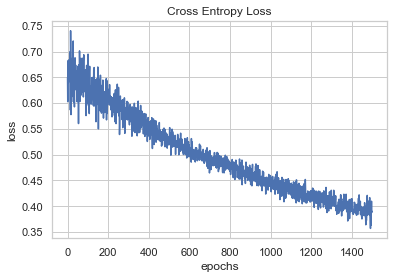

In [1728]:
# Visualization of the results
# loss function
plt.plot(range(len(loss_trace)),loss_trace)
plt.title("Cross Entropy Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

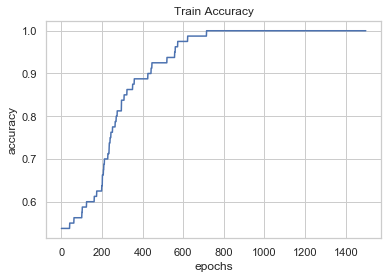

In [1729]:
# plot for training accuracy
plt.plot(range(len(train_acc)),train_acc)
plt.title("Train Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()